In [2]:
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from apps import prod4a_merge_study as merge_study
from python.analysis import Master, Plots, vector
from apps.plotShowerQuantities import info
plt.style.use('ggplot')
plt.rcParams.update({'patch.linewidth': 1})
plt.rcParams.update({'font.size': 10})

#* plot labels
plot_labels = info("Invariant mass (MeV)", "Opening angle (rad)", "Leading shower energy (MeV)", "Sub leading shower energy (MeV)", "$\pi^{0}$ momentum (MeV)")

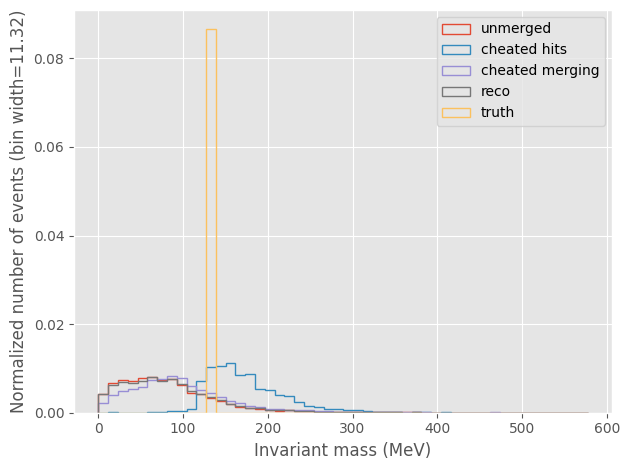

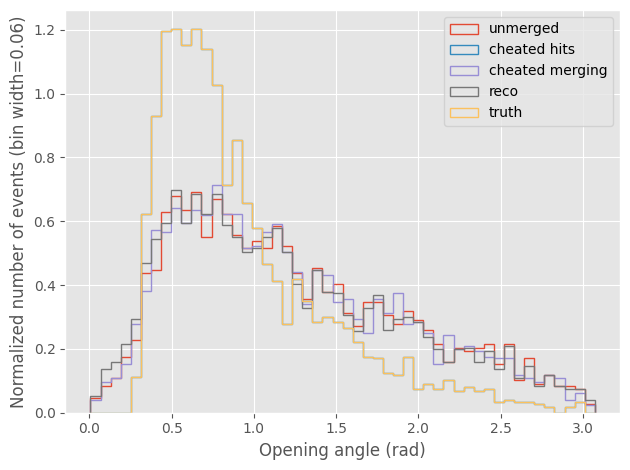

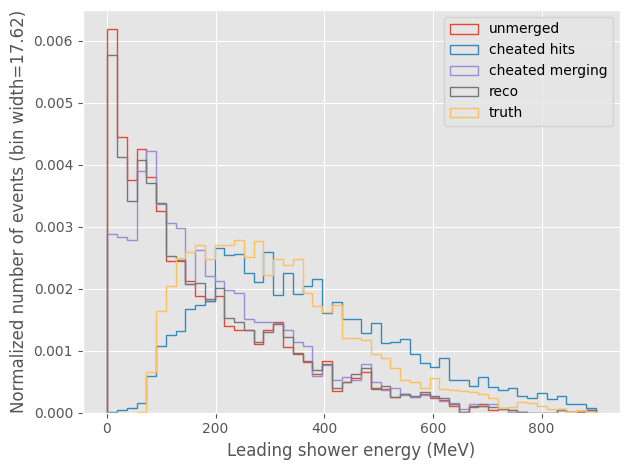

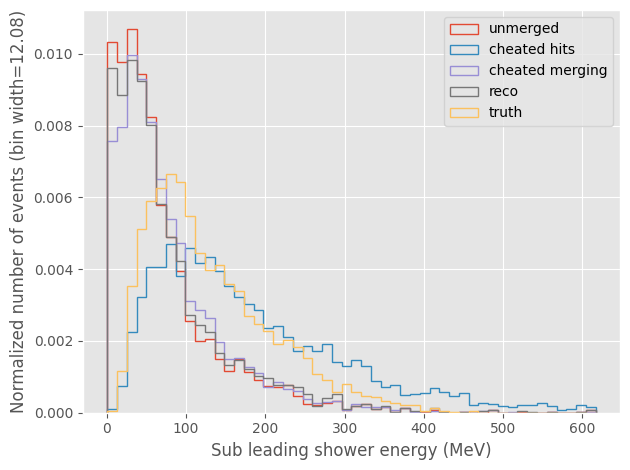

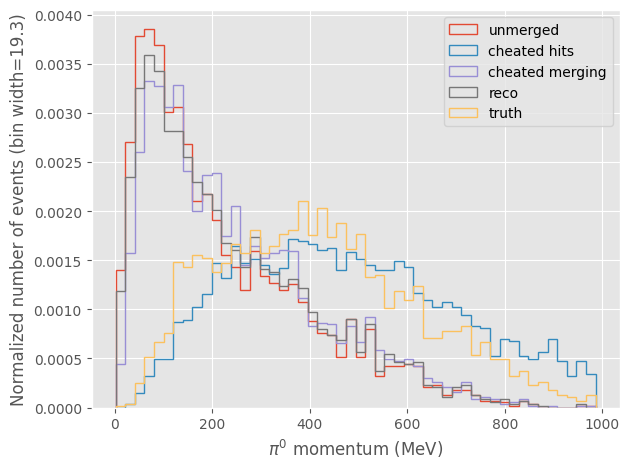

In [10]:
df_unmerged = pd.read_csv("Prod4a_1GeV_BeamSim_analysis/shower-pairs-unmerged.csv")
df_cheat = pd.read_csv("Prod4a_1GeV_BeamSim_analysis/shower-pairs-cheat.csv")
df_purity = pd.read_csv("Prod4a_1GeV_BeamSim_analysis/shower-pairs-purity.csv")

q = ["mass", "angle", "lead_energy", "sub_energy", "pi0_mom"]

unmerged = df_unmerged.filter(regex="reco*")
cheated = df_cheat.filter(regex="reco*")
cheated_hits = df_purity.filter(regex="cheat*")
reco = df_purity.filter(regex="reco*")
truth = df_purity.filter(regex="true*")

for quantity in q:
    data = [
        unmerged.filter(regex = f".*{quantity}.*"),
        cheated_hits.filter(regex = f".*{quantity}.*"),
        cheated.filter(regex = f".*{quantity}.*"),
        reco.filter(regex = f".*{quantity}.*"),
        truth.filter(regex = f".*{quantity}.*")
    ]
    Plots.PlotHistComparison(data, labels = ["unmerged", "cheated hits", "cheated merging", "reco", "truth"], bins = 50, density = True, xlabel = plot_labels[quantity])
    # Plots.Save(quantity)

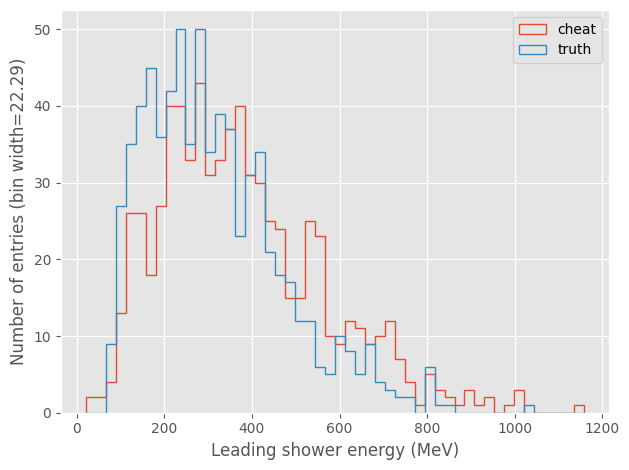

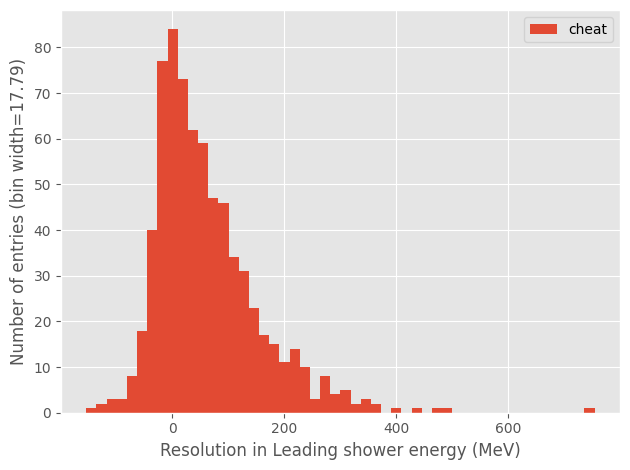

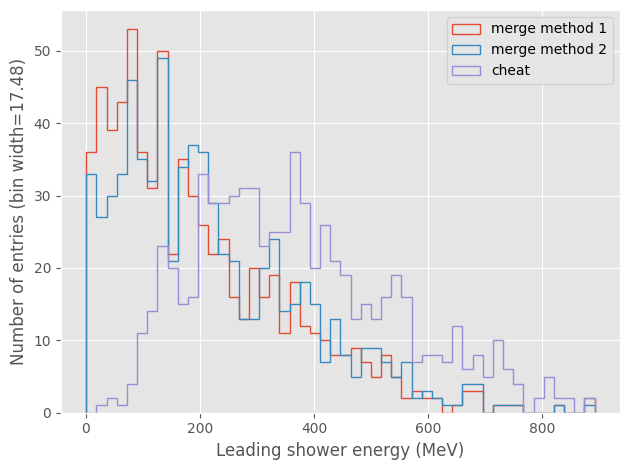

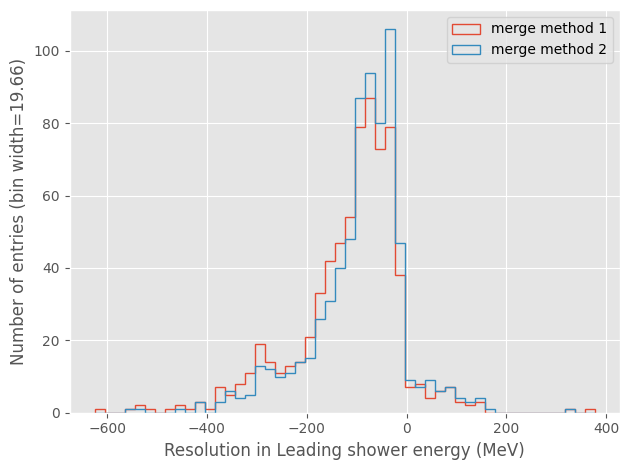

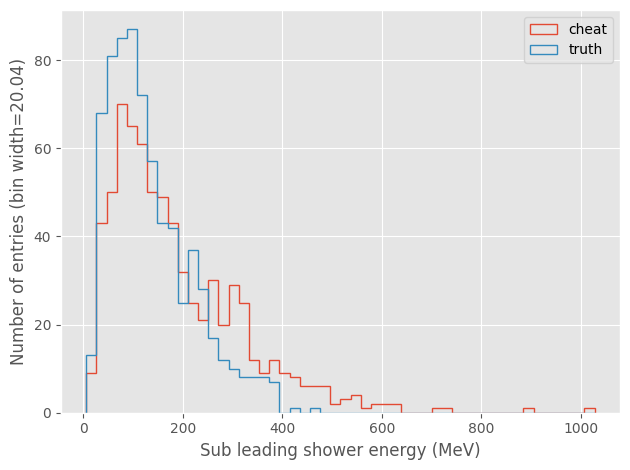

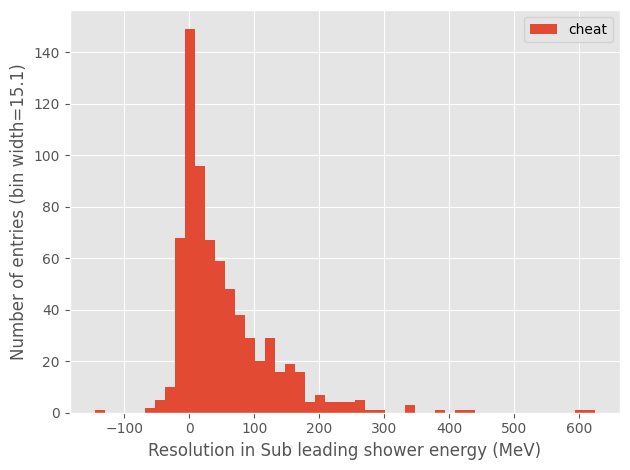

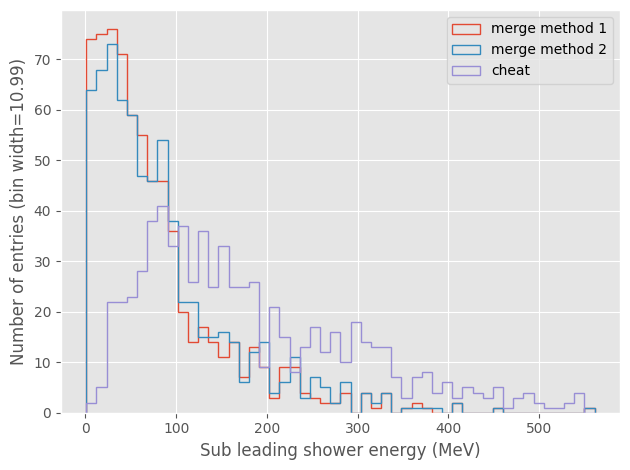

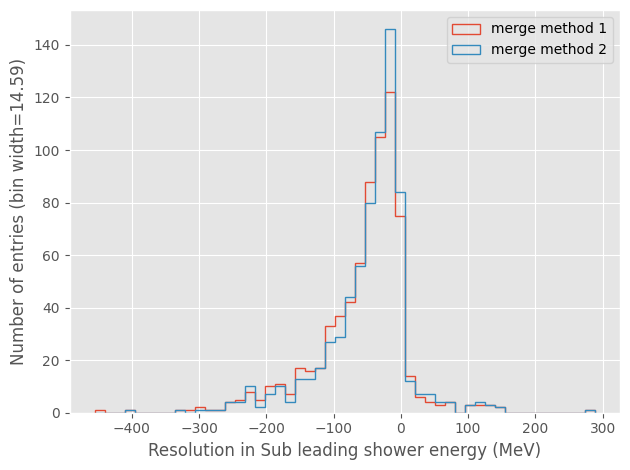

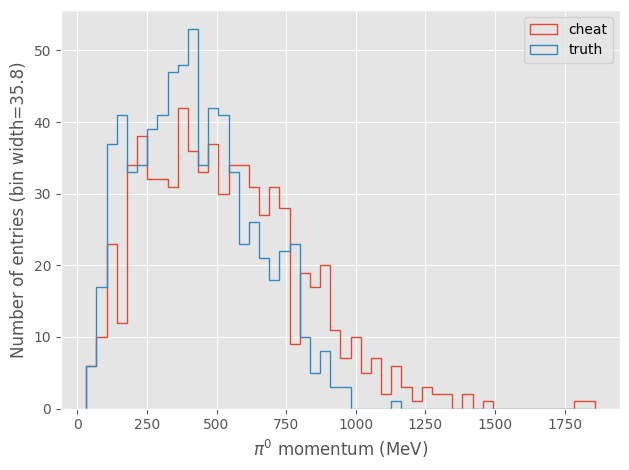

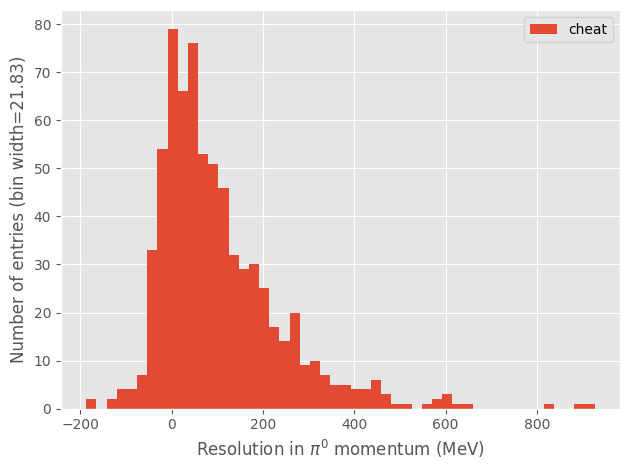

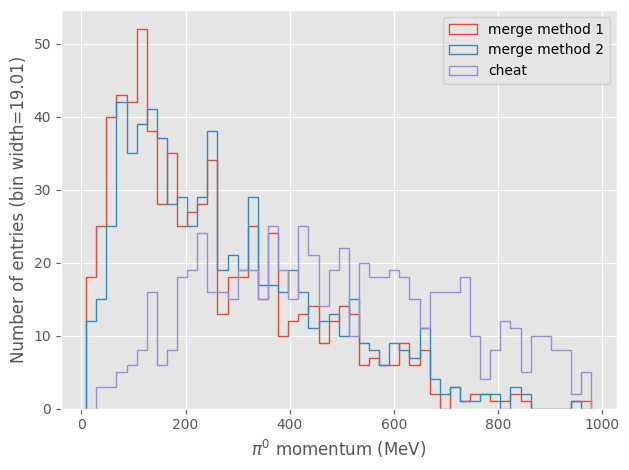

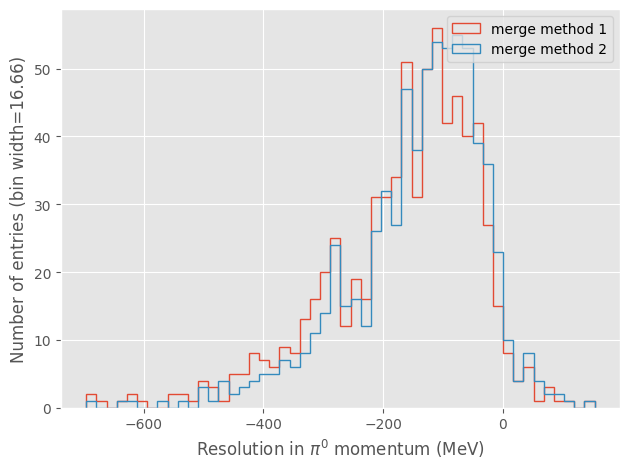

In [5]:
merge_1 = pd.read_csv("test/cheated_energy_study/csv/cheated_merge_method_1.csv").filter(regex = "reco")
merge_2 = pd.read_csv("test/cheated_energy_study/csv/cheated_merge_method_2.csv").filter(regex = "reco")
cheat = pd.read_csv("test/cheated_energy_study/csv/cheated_merge_method_2.csv").filter(regex = "cheat")
truth = pd.read_csv("test/cheated_energy_study/csv/cheated_merge_method_2.csv").filter(regex = "true")

q_regex = ["lead_energy", "sub_energy", "pi0_mom"] # regex for columns

directory = "test/cheated_energy_study/"

for q in q_regex:
    Plots.PlotHistComparison([cheat.filter(regex = q), truth.filter(regex = q)], labels = ["cheat", "truth"], xlabel = plot_labels[q], density = False, bins = 50)
    # Plots.Save(f"cheat_vs_truth_{q}", directory)
    
    diff_ct = cheat.filter(regex = q).values - truth.filter(regex = q).values
    Plots.PlotHist(diff_ct, xlabel = "Residual in " + plot_labels[q], bins = 50, label = "cheat")

    Plots.PlotHistComparison([merge_1.filter(regex = q), merge_2.filter(regex = q), cheat.filter(regex = q)], labels = ["merge method 1", "merge method 2", "cheat"], xlabel = plot_labels[q], density = False, bins = 50)
    # Plots.Save(f"cheat_vs_merge_{q}", directory)

    diff_1 = merge_1.filter(regex = q).values - truth.filter(regex = q).values
    diff_2 = merge_2.filter(regex = q).values - truth.filter(regex = q).values
    Plots.PlotHistComparison([diff_1, diff_2], labels = ["merge method 1", "merge method 2"], xlabel = "Residual in " + plot_labels[q], density = False, bins = 50)

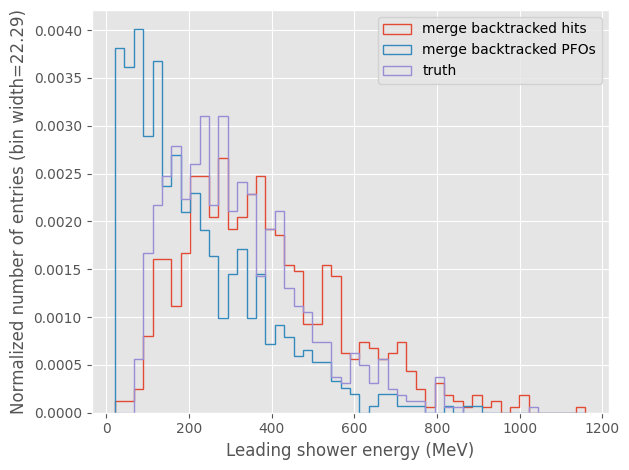

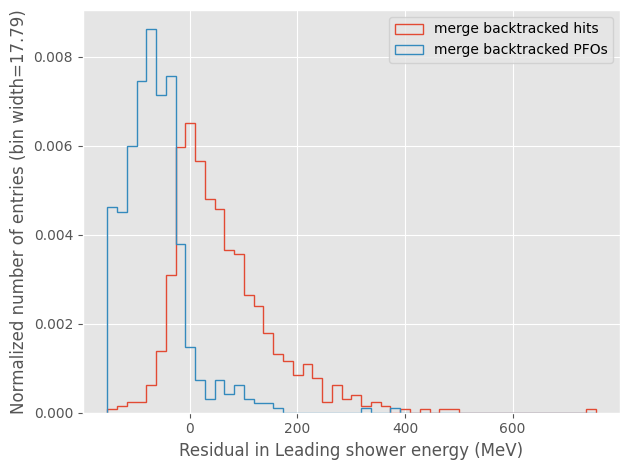

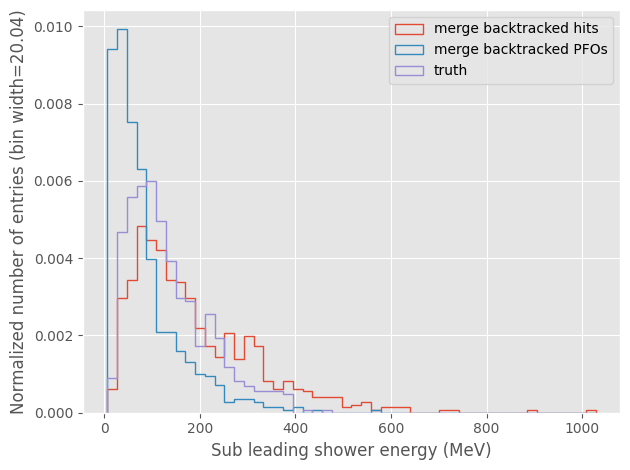

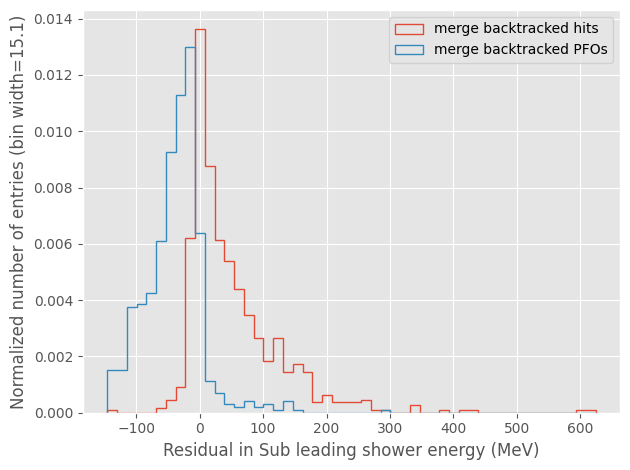

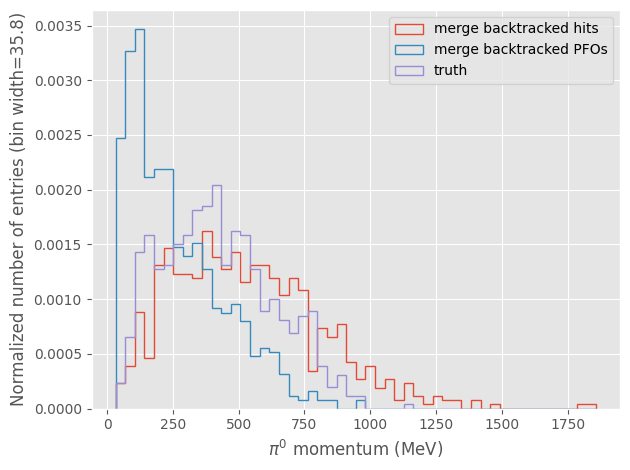

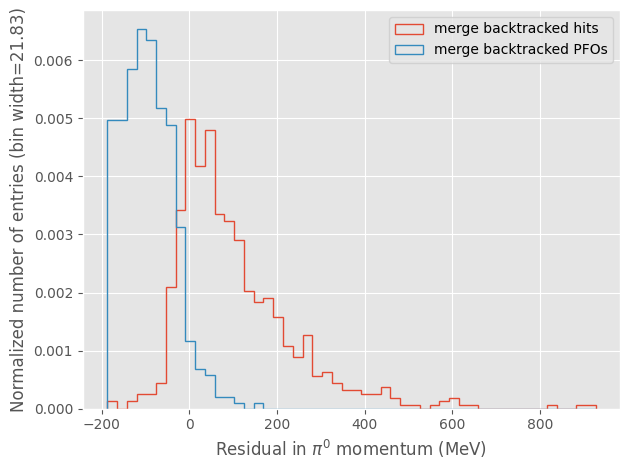

In [15]:
merge_1 = pd.read_csv("test/cheated_energy_study/csv/cheated_merge_method_1.csv").filter(regex = "reco")
cheat = pd.read_csv("test/cheated_energy_study/csv/cheated_merge_method_1.csv").filter(regex = "cheat")
truth = pd.read_csv("test/cheated_energy_study/csv/cheated_merge_method_1.csv").filter(regex = "true")

q_regex = ["lead_energy", "sub_energy", "pi0_mom"] # regex for columns

directory = "test/cheated_energy_study/"

for q in q_regex:
    c = cheat.filter(regex = q).values
    m = merge_1.filter(regex = q).values
    t = truth.filter(regex = q).values
    res_c = c - t
    res_1 = m - t
    
    Plots.PlotHistComparison([c, m, t], labels = ["merge backtracked hits", "merge backtracked PFOs", "truth"], bins = 50, xlabel = plot_labels[q])
    # Plots.Save(q, directory)
    
    Plots.PlotHistComparison([res_c, res_1], labels = ["merge backtracked hits", "merge backtracked PFOs"], bins = 50, xlabel = "Residual in " + plot_labels[q])
    # Plots.Save("residual_" + q, directory)

In [ ]:
def reshape(array : ak.Array):
    return ak.concatenate(ak.unflatten(array, 1, -1), -1)

df = pd.read_csv("test/true_shower_data_all.csv")
cheated_energy = pd.read_csv("test/job_output/shower-pairs/shower-pairs-cheat.csv").filter(regex = "reco.*energy|true.*energy")

In [ ]:
df = pd.read_csv("test/count_shared_hits/shower_data_count.csv.csv")["n_shared_hits"]
Plots.PlotHist(df.values, 100, xlabel = "number of shared hits between shower pairs")
plt.show()
# Plots.Save("n_shared_hits", "test/count_shared_hits/")

In [ ]:
xl = ["Leading shower energy residual (MeV)", "Sub leading shower energy residual (MeV)", "Total energy residual (MeV)"]

true_energies = reshape(ak.Array([df["true_energy_0"].values, df["true_energy_1"].values]))
sort = ak.argsort(true_energies, -1, ascending = False)

true_energies = true_energies[sort]
true_energies_hits = reshape(ak.Array([df["true_energy_hits_0"], df["true_energy_hits_1"]]))[sort]

shared_energies = reshape(ak.Array([df["shared_energy_0"], df["shared_energy_1"]]))[sort]

mask = true_energies < true_energies_hits

original = true_energies_hits - true_energies
corrected = original - shared_energies
masked = np.where(mask, original - shared_energies, original)

cheated_0 = cheated_energy["reco_lead_energy"] - cheated_energy["true_lead_energy"]
cheated_1 = cheated_energy["reco_sub_energy"] - cheated_energy["true_sub_energy"]
cheated = reshape(ak.Array([cheated_0.values, cheated_1.values]))

Plots.PlotHist(ak.ravel(true_energies_hits - shared_energies), bins = 50, xlabel = "Total corrected backtracked energy (MeV)")
# Plots.Save("total_corrected_energy", directory = "test/")

Plots.PlotHist(corrected[:, 0], bins = 50, xlabel = xl[0])
# Plots.Save("leading_corrected_energy_residual", "test/")

Plots.PlotHist(corrected[:, 1], bins = 50, xlabel = xl[1])
# Plots.Save("sub_leading_corrected_energy_residual", "test/")

Plots.PlotHist(ak.sum(corrected, -1), bins = 50, xlabel = xl[2])
# Plots.Save("total_corrected_energy_residual", "test/")

l = ["backtracked hits", "corrected backtracked hits", "masked"]
[Plots.PlotHistComparison([original[:, i], corrected[:, i], masked[:, i]], bins = 50, labels = l, xlabel = xl[i]) for i in range(2)]

Plots.PlotHistComparison([ak.sum(original, -1), ak.sum(corrected, -1), ak.sum(masked, -1)], bins = 50, labels = l, xlabel = xl[2])

l = ["corrected backtracked hits", "backtracked hits", "backtracked PFOs"]
s = ["leading_energy_residual", "sub_leading_energy_residual", "total_energy_residual"]
loc = ["upper right", "upper left"]
for i in range(2):
    Plots.PlotHistComparison([corrected[:, i], original[:, i], cheated[:, i]], bins = 50, labels = l, xlabel = xl[i])
    plt.legend(loc = loc[i])
    # Plots.Save(s[i], "test/")

Plots.PlotHistComparison([ak.sum(corrected, -1), ak.sum(original, -1), ak.sum(cheated, -1)], bins = 50, labels = l, xlabel = xl[2])
plt.legend(loc = "upper left")
# Plots.Save(s[2], "test/")

In [ ]:
df_reco_merge = pd.read_csv("test/job_output_reco/shower-pairs/shower-pairs-purity.csv").filter(regex = "reco.*energy|true.*energy")

df_cheated_correction = pd.read_csv("test/true_shower_data_all.csv")

true_energies = reshape(ak.Array([df_cheated_correction["true_energy_0"].values, df_cheated_correction["true_energy_1"].values]))
sort = ak.argsort(true_energies, -1, ascending = False)

true_energies = true_energies[sort]
true_energies_hits = reshape(ak.Array([df_cheated_correction["true_energy_hits_0"], df_cheated_correction["true_energy_hits_1"]]))[sort]

true_energy_merge_study = reshape(ak.Array([df_reco_merge["true_lead_energy"], df_reco_merge["true_sub_energy"]]))

true_energies = true_energies[ak.argsort(true_energies[:, 0], 0)]
true_energy_merge_study = true_energy_merge_study[ak.argsort(true_energy_merge_study[:, 0], 0)]

true_energy_merge_study = true_energy_merge_study[65 != ak.local_index(true_energy_merge_study, 0)]
true_energy_merge_study = true_energy_merge_study[416 != ak.local_index(true_energy_merge_study, 0)]